## importing the libraries



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

## loading the data


In [114]:
file_path = 'C:\Edrive\datascience\dataset\Food_Delivery_Times.csv'
data = pd.read_csv(file_path)
print(data.describe())
print("data")
df=pd.DataFrame(data)
print(df.to_string())
print("Data")
df=pd.DataFrame(data)
print(df.to_string())

          Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000  1000.000000           1000.000000              970.000000   
mean    500.500000    10.059970             16.982000                4.579381   
std     288.819436     5.696656              7.204553                2.914394   
min       1.000000     0.590000              5.000000                0.000000   
25%     250.750000     5.105000             11.000000                2.000000   
50%     500.500000    10.190000             17.000000                5.000000   
75%     750.250000    15.017500             23.000000                7.000000   
max    1000.000000    19.990000             29.000000                9.000000   

       Delivery_Time_min  
count        1000.000000  
mean           56.732000  
std            22.070915  
min             8.000000  
25%            41.000000  
50%            55.500000  
75%            71.000000  
max           153.000000  
data
     Order_ID  Distanc

## getting info


In [115]:
print(data.isna().sum())

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [116]:
df=data.dropna()

In [117]:
print(df.isna().sum())

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


In [118]:
data.fillna(data.mean(), inplace=True)
data.fillna("Unknown", inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10576\4218970664.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


## Finding Outliers


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Order_ID'),
  Text(1, 0, 'Distance_km'),
  Text(2, 0, 'Preparation_Time_min'),
  Text(3, 0, 'Courier_Experience_yrs'),
  Text(4, 0, 'Delivery_Time_min')])

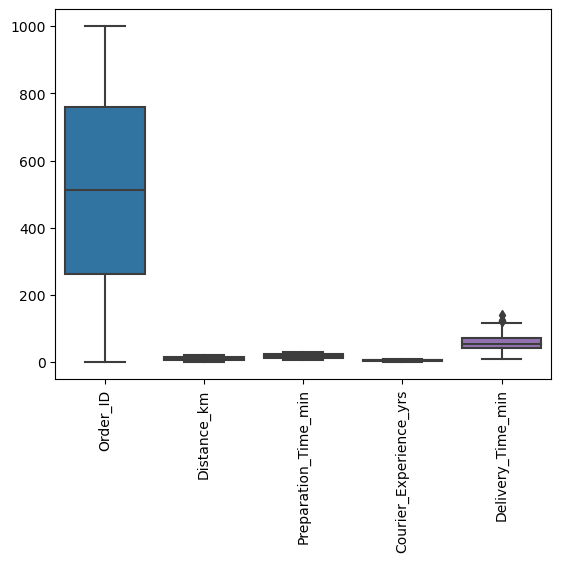

In [119]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

# Assigning independant and dependant varibale to x and y

In [120]:
X= df.iloc[:, 1:8].values 
y = df.iloc[:, 8].values 
print(X)
print(y)


[[7.93 'Windy' 'Low' ... 'Scooter' 12 1.0]
 [16.42 'Clear' 'Medium' ... 'Bike' 20 2.0]
 [9.52 'Foggy' 'Low' ... 'Scooter' 28 1.0]
 ...
 [15.62 'Snowy' 'High' ... 'Scooter' 26 2.0]
 [14.17 'Clear' 'Low' ... 'Bike' 8 0.0]
 [6.63 'Foggy' 'Low' ... 'Scooter' 24 3.0]]
[ 43  84  59  37  68  57  46  35  73  88  76  53  36  35  50  24  27  47
  72  58  37  56  64  56  70  70 123  52 108  45 111  44  73  45  61  34
  47  52  67   8  36  67  43  36  36  56  56  47 104  50  31  35  44  23
  61  82  69  69  60  40  38  52  68  31  54  87  62  42 111  51  41  69
  49  48  46  92  32  71  65  43  68  28  44  70  72  48  69  49  30  73
  42  45  76  94  28  80  57  35  69  87  31  70  57  52  74  69  44  73
  91  65  79  41  77  26  58  56 141  78  29  59  62  80 105  82  91  30
  16 116  25  37  28  49  60  36  49 113  43  60  17  54  66  33  32  61
  64  37  69  68  32  68  30  60  47  65  44  48  75  24  47  31  43  54
  47  35  44  36  43  50  42  62  65  30  46  69  54 108  17  30  16  72
 100  

In [121]:
data = pd.get_dummies(data, columns=["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"], drop_first=True)
X = data.drop("Delivery_Time_min", axis=1)  # Features
y = data["Delivery_Time_min"]  # Target

# Split Data into Training and Test Sets

In [122]:
# Step 5: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# model creation

In [123]:
print("Prediction result on Test Data:")
print(y_pred)

Prediction result on Test Data:
[34.70782514 68.20265234 44.56572126 48.74713264 84.17092628 31.29597722
 69.837721   32.06450998 37.48440999 77.7717505  74.28509279 59.7713635
 36.41391353 76.13554627 88.75452255 81.14263994 32.25946261 68.49209976
 47.1115775  60.4389048  88.40264273 27.53453824 81.91628854 78.74354487
 62.08694734 34.15866703 85.20381263 25.59695765 50.51535019 66.2098164
 69.2151156  16.82161529 60.771148   37.3137419  67.23592404 20.09591467
 61.97293482 53.18375064 48.68490354 75.14746101 75.56892265 30.85334973
 80.51311307 67.36780725 36.90477128 14.29148571 90.46260439 82.69733752
 77.67844617 26.13594405 73.94397333 64.20300517 38.17430907 80.08842644
 56.43684424 52.90275256 76.1479396  81.65760298 65.82011351 92.6538168
 48.14985095 35.48469446 50.1619692  47.49115106 51.49732437 65.34761101
 60.95482268 90.63516864 76.22661084 58.09433914 81.55588163 35.18747642
 93.40791376 23.8692254  65.06848165 58.39127545 38.89502637 45.05726622
 52.15331567 31.862082

In [124]:
df2 = pd.DataFrame({'Actual Y-Data': y_test, 'Predicted Y-Data': y_pred})
print(df2.head())

     Actual Y-Data  Predicted Y-Data
521             32         34.707825
737             68         68.202652
740             39         44.565721
660             44         48.747133
411             85         84.170926


In [125]:
print(data.describe())

          Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000  1000.000000           1000.000000             1000.000000   
mean    500.500000    10.059970             16.982000                4.579381   
std     288.819436     5.696656              7.204553                2.870301   
min       1.000000     0.590000              5.000000                0.000000   
25%     250.750000     5.105000             11.000000                2.000000   
50%     500.500000    10.190000             17.000000                4.579381   
75%     750.250000    15.017500             23.000000                7.000000   
max    1000.000000    19.990000             29.000000                9.000000   

       Delivery_Time_min  Weather_Foggy  Weather_Rainy  Weather_Snowy  \
count        1000.000000    1000.000000    1000.000000    1000.000000   
mean           56.732000       0.103000       0.204000       0.097000   
std            22.070915       0.304111       0.403

In [126]:
print(data.to_string())

     Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  Weather_Foggy  Weather_Rainy  Weather_Snowy  Weather_Unknown  Weather_Windy  Traffic_Level_Low  Traffic_Level_Medium  Traffic_Level_Unknown  Time_of_Day_Evening  Time_of_Day_Morning  Time_of_Day_Night  Time_of_Day_Unknown  Vehicle_Type_Car  Vehicle_Type_Scooter
0         522         7.93                    12                1.000000                 43              0              0              0                0              1                  1                     0                      0                    0                    0                  0                    0                 0                     1
1         738        16.42                    20                2.000000                 84              0              0              0                0              0                  0                     1                      0                    1                    0                

In [130]:
from sklearn.metrics import r2_score
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score*100,"%")

r2 socre is  82.8843062090573 %


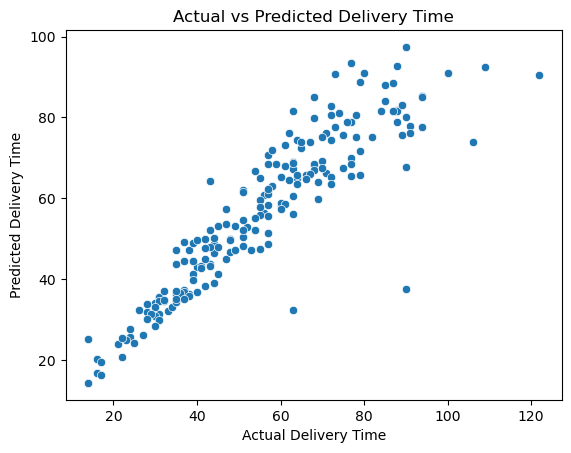

In [128]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.show()

In [132]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score=r2_score(y_test,y_pred)
print("r2 socre is ",score*100,"%")
df2_xgb = pd.DataFrame({'Actual Y-Data': y_test, 'Predicted Y-Data': y_pred_xgb})
print(df2_xgb.head())



r2 socre is  82.8843062090573 %
     Actual Y-Data  Predicted Y-Data
521             32         34.232319
737             68         68.848038
740             39         46.781731
660             44         51.341675
411             85         72.143456


# boosting model

In [141]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Instantiate and fit the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Fit the model to the training data
gbr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gbr = gbr_model.predict(X_test)

# Calculate R² (R-squared) score for the Gradient Boosting Regressor model
r2_gbr_percentage = round(r2_gbr * 100)

# Print the percentage R² score
print(f"R² Score with Gradient Boosting Regressor: {r2_gbr_percentage}%")

# Optionally, create a DataFrame to compare Actual vs Predicted values
df2_gbr = pd.DataFrame({'Actual Y-Data': y_test, 'Predicted Y-Data': y_pred_gbr})
print(df2_gbr.head())




R² Score with Gradient Boosting Regressor: 74%
     Actual Y-Data  Predicted Y-Data
521             32         36.356081
737             68         67.475582
740             39         45.898410
660             44         48.632299
411             85         77.226298
